In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

## Funções

In [2]:
def aux(df):
    
    
    '''
    in: DataFrame;
    out: DataFrame auxiliar
    '''
    
    
    df_aux = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})
    df_aux['percentual%'] = round(df_aux['missing'] / df_aux['size'],3)*100

    
    return df_aux

## Sumário

1. [Descrição do dataset](#description)
2. [Ingestão dos dados](#ingestion)
3. [Análise expoloratória inicial](#eda)
4. [Outliers](#out)
5. [Salvando bases](#save)
6. [Considerações](#cons)

## Descrição do dataset

* **idade**: A idade do cliente.

* **numero_de_dependentes**: O número de pessoas dependentes do cliente.

* **salario_mensal**: Salário mensal do cliente.

* **numero_emprestimos_imobiliarios**: Quantidade de empréstimos imobiliários que o cliente possui em aberto.

* **numero_vezes_passou_90_dias**: Número de vezes que o tomador passou mais de 90 dias em atraso.

* **util_linhas_inseguras**: Quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc.

* **vezes_passou_de_30_59_dias**: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.

* **razao_debito**: Razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio

* **numero_linhas_crdto_aberto**: Número de empréstimos em aberto pelo cliente.

* **numero_de_vezes_que_passou_60_89_dias**: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.

> Obs: Estes dados são fictícios, portanto é possível que existam incoerências, o que é perfeitamente comum em dados reais.

## Ingestão dos dados

In [3]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_RAW_NAME = 'treino.csv'
DATA_RAW_NAME_TEST = 'teste.csv'
DATA_INTER_PATH = os.path.join('..','data','interim')
DATA_INTER_PROCESSED = os.path.join('..', 'data', 'processed')
DATA_INTER_TRAIN_NAME = 'df_train.csv'
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [4]:
df_raw = pd.read_csv(os.path.join(DATA_RAW_PATH,DATA_RAW_NAME))

## Análise exploratória inicial

In [5]:
aux(df_raw)

,colunas,tipo,missing,size,unicos,percentual%
inadimplente,inadimplente,int64,0,110000,2,0.0
util_linhas_inseguras,util_linhas_inseguras,float64,0,110000,92671,0.0
idade,idade,int64,0,110000,86,0.0
vezes_passou_de_30_59_dias,vezes_passou_de_30_59_dias,int64,0,110000,15,0.0
razao_debito,razao_debito,float64,0,110000,86002,0.0
salario_mensal,salario_mensal,float64,21763,110000,12228,19.8
numero_linhas_crdto_aberto,numero_linhas_crdto_aberto,int64,0,110000,57,0.0
numero_vezes_passou_90_dias,numero_vezes_passou_90_dias,int64,0,110000,18,0.0
numero_emprestimos_imobiliarios,numero_emprestimos_imobiliarios,int64,0,110000,28,0.0
numero_de_vezes_que_passou_60_89_dias,numero_de_vezes_que_passou_60_89_dias,int64,0,110000,13,0.0


In [6]:
if (df_raw.duplicated().sum() != 0):
    print(f'Há {df_raw.duplicated().sum()} valores duplicados.')
    print('Excluindo...')
    df_raw.drop_duplicates(inplace=True)
    print('Linhas duplicadas removidas.')
else:
    print('Não existe valores duplicados.')

Há 363 valores duplicados.
Excluindo...
Linhas duplicadas removidas.


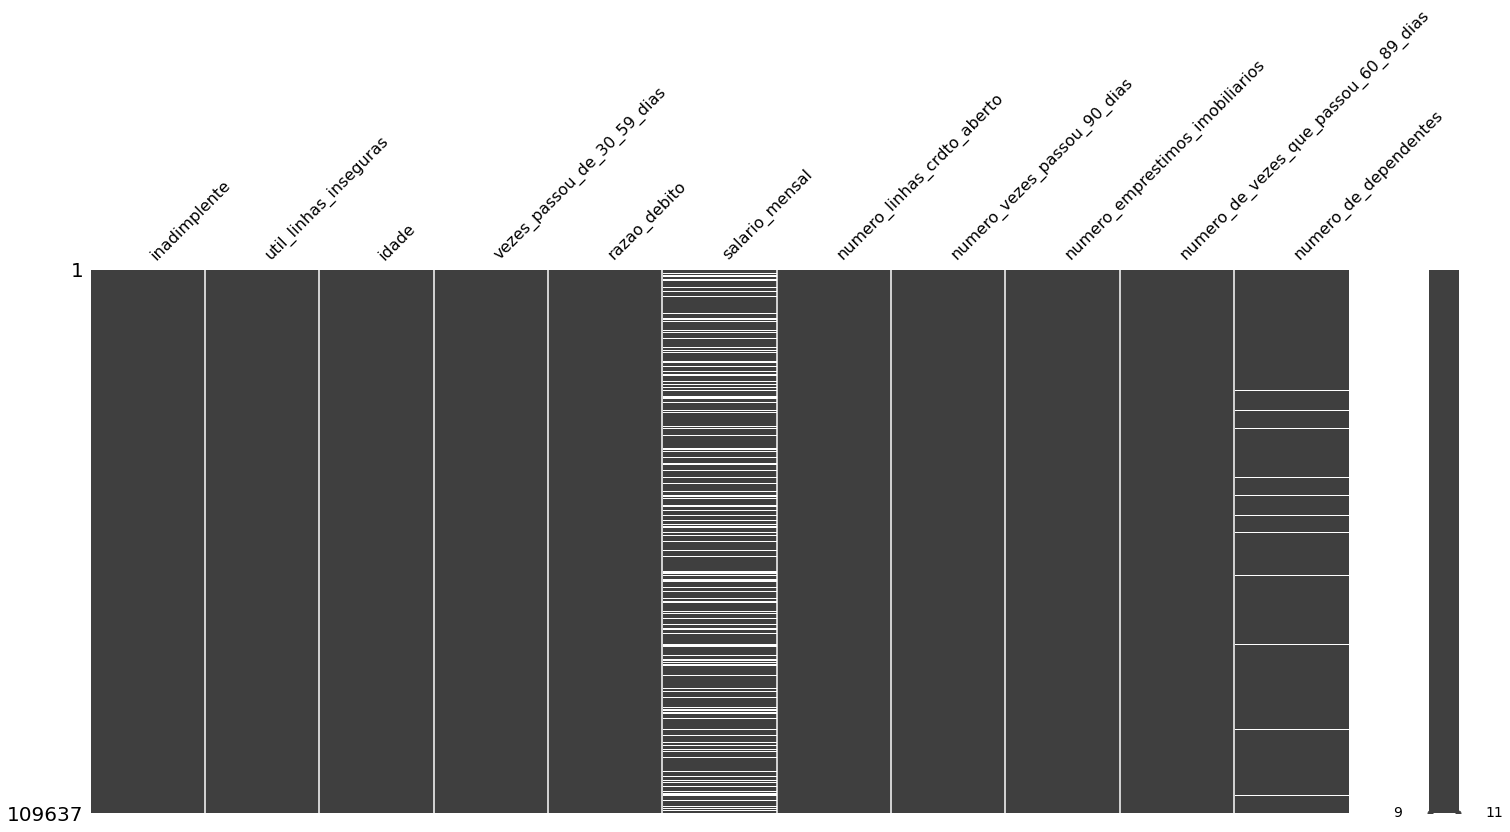

In [7]:
msno.matrix(df_raw)

plt.savefig(os.path.join(IMG_PATH,'relacao-missing-values.png'), format='png')

In [8]:
df_raw.dtypes.value_counts()

int64      7
float64    4
dtype: int64

In [9]:
df_raw.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,109637.000000,109637.000000,109637.000000,109637.000000,109637.000000,8.817700e+04,109637.000000,109637.000000,109637.000000,109637.000000,106816.000000
mean,0.066748,5.947980,52.267501,0.400431,355.993282,6.641456e+03,8.468656,0.245756,1.023268,0.219670,0.759624
std,0.249585,252.719105,14.729568,3.951084,2077.470901,1.338760e+04,5.131074,3.924871,1.136349,3.910491,1.115525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030284,41.000000,0.000000,0.176820,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155958,52.000000,0.000000,0.367923,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.560236,63.000000,0.000000,0.871880,8.233000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Outliers

In [10]:
Q1 = df_raw.drop(columns=['inadimplente','numero_emprestimos_imobiliarios', 'numero_de_dependentes','vezes_passou_de_30_59_dias', 'numero_linhas_crdto_aberto','numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias']).quantile(0.25)
Q3 = df_raw.drop(columns=['inadimplente','numero_emprestimos_imobiliarios', 'numero_de_dependentes','vezes_passou_de_30_59_dias', 'numero_linhas_crdto_aberto','numero_vezes_passou_90_dias', 'numero_de_vezes_que_passou_60_89_dias']).quantile(0.75)
IQR = Q3 - Q1
IQR

util_linhas_inseguras       0.529951
idade                      22.000000
razao_debito                0.695060
salario_mensal           4833.000000
dtype: float64

In [11]:
df_raw = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) | (df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]

## Salvando bases

In [12]:
df_raw.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TRAIN_NAME), index=False)

## Considerações

* Há valores missing nas variáveis **salario_mensal** e **numero_de_depedentes**;
* Há pessoas com idade 0 que foram eliminadas no corte de outliers;
* O **salário_mensal** vai de 0 até R$3.008.750,00.